In [25]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

Input = np.array([
  [1, 1],
  [2, 2],
  [3, 3],
])

X = Input[:, 0].reshape(-1,1)
Y = Input[:, 1].reshape(-1, 1)

class LinearRegression(nn.Module):
    """
    使用神经网络模型实现线性回归
    模型层次: 输入层 -> 隐藏层 -> 输出层
    """
    def __init__(self, n_in, n_hidden, n_out):
        super(LinearRegression, self).__init__()
        self.fc1 = nn.Linear(n_in, n_hidden) # 定义第一个全连接层
        self.fc2 = nn.Linear(n_hidden, n_out)
        
    def forward(self, x):
        z1 = self.fc1(x)
        a1 = torch.sigmoid(z1)
        y = self.fc2(a1)
        return y

n_in = len(X[0])
n_hidden = 10
n_out = len(Y[0])

X_tensor = torch.from_numpy(X).float()
Y_tensor = torch.from_numpy(Y).float()

model = LinearRegression(n_in, n_hidden, n_out)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = nn.MSELoss()

for i in range(1000):
  optimizer.zero_grad()
  output = model(X_tensor) # 前向传播
  loss = criterion(output, Y_tensor)
  loss.backward() # 反向传播
  optimizer.step()
  if i % 100 == 0:
    print('epoch {}, loss {}'.format(i, loss.item()))

epoch 0, loss 3.770095109939575
epoch 100, loss 0.4005397856235504
epoch 200, loss 0.02440524846315384
epoch 300, loss 0.0033609147649258375
epoch 400, loss 0.0018636510940268636
epoch 500, loss 0.0011670052772387862
epoch 600, loss 0.0007715055253356695
epoch 700, loss 0.0005248389788903296
epoch 800, loss 0.00036238401662558317
epoch 900, loss 0.00025176143390126526


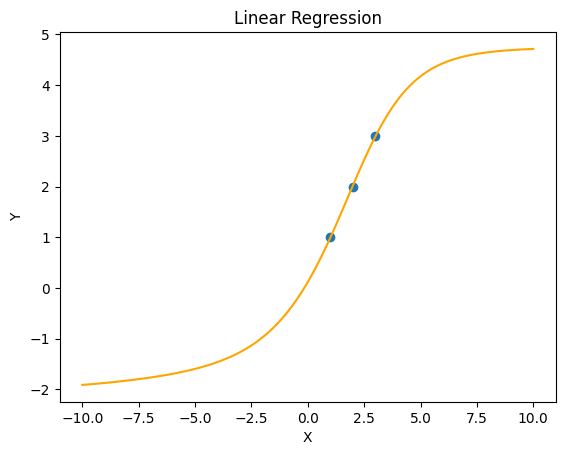

In [28]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

plt.scatter(X, Y)
input = np.linspace(-10, 10, 100)
output = model(torch.from_numpy(input).float().reshape(-1, 1)).detach().numpy()

# 评估模式
model.eval()

plt.plot(input, output, color='orange')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression')
plt.show()